This notebook is dedicated to explore the dataset related to gun laws

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PV_data = pd.read_csv('./data/police_violence.csv', index_col=0)
PV_data.head()

,victim_age,victim_gender,victim_race,City,State,criminal_charges,victim_armed,alleged_weapon,victim_fleeing,year
6177,41.0,Male,black,Spartanburg,SC,No known charges,Allegedly Armed,knife,not fleeing,2015
2363,29.0,Male,black,Newark,NJ,No known charges,Vehicle,vehicle,car,2018
2364,37.0,Male,black,Newark,NJ,No known charges,Allegedly Armed,gun,NaN,2018
5686,28.0,Male,black,Wilmington,DE,No known charges,Allegedly Armed,gun,not fleeing,2015
2366,34.0,Male,black,Orlando,FL,No known charges,Allegedly Armed,gun,not fleeing,2018


In [3]:
races = ["white", "black", "hispanic"]

### Distribution of states among victims carrying a gun:

In [4]:
df_guns = PV_data.query('alleged_weapon == "gun"')
total = len(df_guns)

In [5]:
count_by_state = df_guns.groupby('State').count()
states = df_guns.State.unique()

In [6]:
#Number of victims carrying a gun by state
guns_by_state = dict({})

for state in states:
    c = count_by_state.loc[state:state, 'victim_race'][0]
    guns_by_state[state] = c
    #print("%s : %d"%(state, c))

In [7]:
max_key = max(guns_by_state, key=guns_by_state.get)
min_key = min(guns_by_state, key=guns_by_state.get)
min_key, max_key

('HI', 'CA')

### What is the percentage of carrying a gun in every state

In [8]:
df_states = PV_data.groupby('State').count()

#Total number of victims by state
victims_by_state = {}
for state in states:
    c = df_states.loc[state:state, 'victim_race'][0]
    victims_by_state[state] = c
    
#victims_by_state

In [9]:
#percentage of victim carrying a gun (and not only another weapon) by state
prct_of_gun_by_state = {}
for state in states:
    prct_of_gun_by_state[state] = np.around(guns_by_state[state] / victims_by_state[state] * 100, decimals=2)
#prct_of_gun_by_state

In [10]:
max_key = max(prct_of_gun_by_state, key=prct_of_gun_by_state.get)
min_key = min(prct_of_gun_by_state, key=prct_of_gun_by_state.get)
min_key, max_key

('HI', 'ID')

Between 2019 and 2020

In [11]:
data_19_20 = PV_data.query('year >= 2019')

In [12]:
df_states_19_20 = data_19_20.groupby('State').count()
states = df_states_19_20.index 

#Total number of victims by state
victims_by_state_19_20 = {}
for state in states:
    c = df_states_19_20.loc[state:state, 'victim_race'][0]
    victims_by_state_19_20[state] = c
    
#victims_by_state

In [13]:
gun_data_19_20 = data_19_20.query('alleged_weapon == "gun"')
#Number of victims carrying a gun by state 
df_guns_19_20 = gun_data_19_20.groupby('State').count()
states = df_guns_19_20.index 

guns_by_state_19_20 = dict({})

for state in states:
    c = df_guns_19_20.loc[state:state, 'victim_race'][0]
    guns_by_state_19_20[state] = c
    #print("%s : %d"%(state, c))

In [14]:
#percentage of victim carrying a gun (and not only another weapon) by state
prct_of_gun_by_state_19_20 = {}
for state in states:
    prct_of_gun_by_state_19_20[state] = np.around(guns_by_state_19_20[state] / victims_by_state_19_20[state] * 100, decimals=2)
#prct_of_gun_by_state

In [15]:
max_key = max(prct_of_gun_by_state_19_20, key=prct_of_gun_by_state_19_20.get)
min_key = min(prct_of_gun_by_state_19_20, key=prct_of_gun_by_state_19_20.get)
min_key, max_key

('NH', 'DC')

# Plots

### Percentage of carrying a gun in each state, Vs gun law strength

In [16]:
df_guns_plot = pd.DataFrame.from_dict(prct_of_gun_by_state, orient='index', columns=['%_carrying_gun'])
df_guns_plot['State'] = df_guns_plot.index
df_guns_plot.head()

,%_carrying_gun,State
NJ,39.80,NJ
DE,50.00,DE
FL,52.97,FL
MD,44.70,MD
WV,61.90,WV


In [17]:
gunlaw_data = pd.read_csv('./data/gunlaw_ranking.csv', index_col=0)
gunlaw_data.head()

,state_gunlaw_strength,State,state_gunlaw_grade,state_gun_death_rate,state_gun_death_rate_per_100K
0,38,AL,F,2,21.70
1,42,AK,F,7,20.74
2,45,AZ,F,18,15.29
3,40,AR,F,8,18.96
4,1,CA,A,44,7.45


In [18]:
df_result = pd.merge(df_guns_plot, gunlaw_data, on='State')
df_result = df_result.sort_values(by=['state_gunlaw_strength'])
df_result = df_result[['State', 'state_gunlaw_strength', 'state_gunlaw_grade', '%_carrying_gun']]
df_result.head()

,State,state_gunlaw_strength,state_gunlaw_grade,%_carrying_gun
8,CA,1,A,39.64
0,NJ,2,A,39.80
37,CT,3,A-,36.11
24,NY,4,A-,43.12
25,HI,5,A-,20.00


Text(0.5, 0, 'States sorted from safest (CA) to most dangerous (MS), based on gun laws strength')

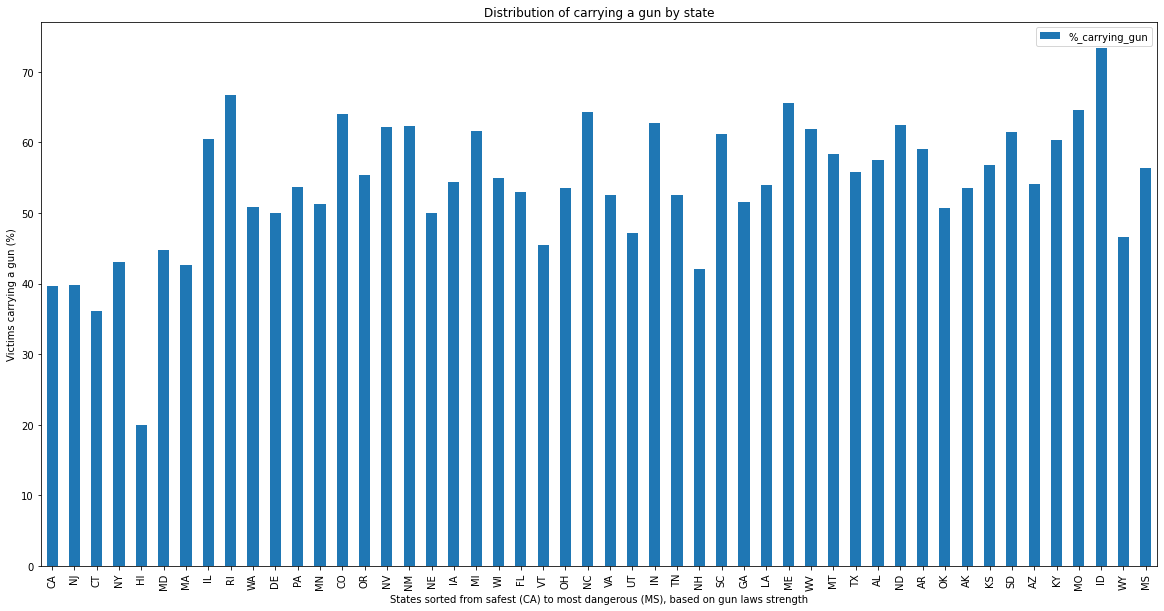

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

df_result.plot(ax=ax, x='State', y='%_carrying_gun', kind='bar')

ax.set_title('Distribution of carrying a gun by state')
ax.set_ylabel('Victims carrying a gun (%)')
ax.set_xlabel('States sorted from safest (CA) to most dangerous (MS), based on gun laws strength')

### Averaging the percentage of carrying a gun in each category of state. Categories are defined by gunlaw grade (2019)

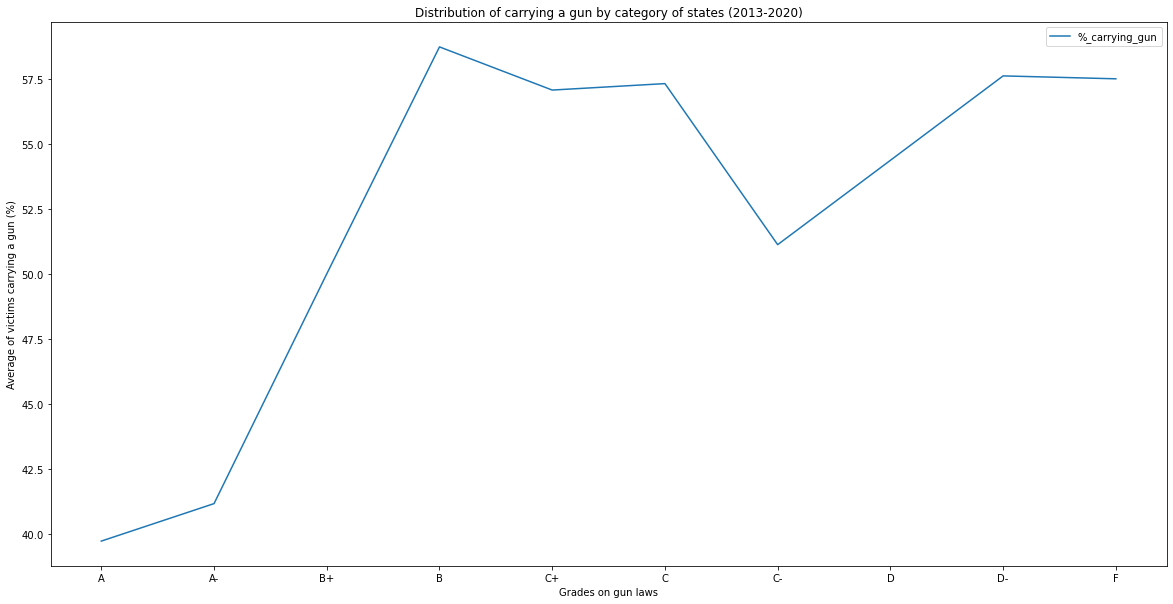

In [20]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

df_avg = df_result.groupby('state_gunlaw_grade').mean()
df_avg['grade'] = df_avg.index

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

df_avg.plot(ax=ax, x='grade', y='%_carrying_gun')

ax.set_title('Distribution of carrying a gun by category of states (2013-2020)')
ax.set_ylabel('Average of victims carrying a gun (%)')
ax.set_xlabel('Grades on gun laws')

"""Make all grades appear on xticks"""
labels=df_result.state_gunlaw_grade.unique()
xs=range(len(labels))

def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Between 2019 and 2020

In [21]:
df_guns_plot_19_20 = pd.DataFrame.from_dict(prct_of_gun_by_state_19_20, orient='index', columns=['%_carrying_gun_19_20'])
df_guns_plot_19_20['State'] = df_guns_plot_19_20.index
df_guns_plot_19_20.head()

,%_carrying_gun_19_20,State
AK,80.00,AK
AL,74.07,AL
AR,57.14,AR
AZ,50.00,AZ
CA,43.14,CA


In [22]:
df_result_19_20 = pd.merge(gunlaw_data, df_guns_plot_19_20, on='State')
df_result_19_20 = df_result_19_20.sort_values(by=['state_gunlaw_strength'])
df_result_19_20 = df_result_19_20[['State', 'state_gunlaw_strength', 'state_gunlaw_grade', '%_carrying_gun_19_20']]
df_result_19_20.head()

,State,state_gunlaw_strength,state_gunlaw_grade,%_carrying_gun_19_20
4,CA,1,A,43.14
27,NJ,2,A,44.44
6,CT,3,A-,37.50
29,NY,4,A-,53.85
17,MD,6,A-,58.06


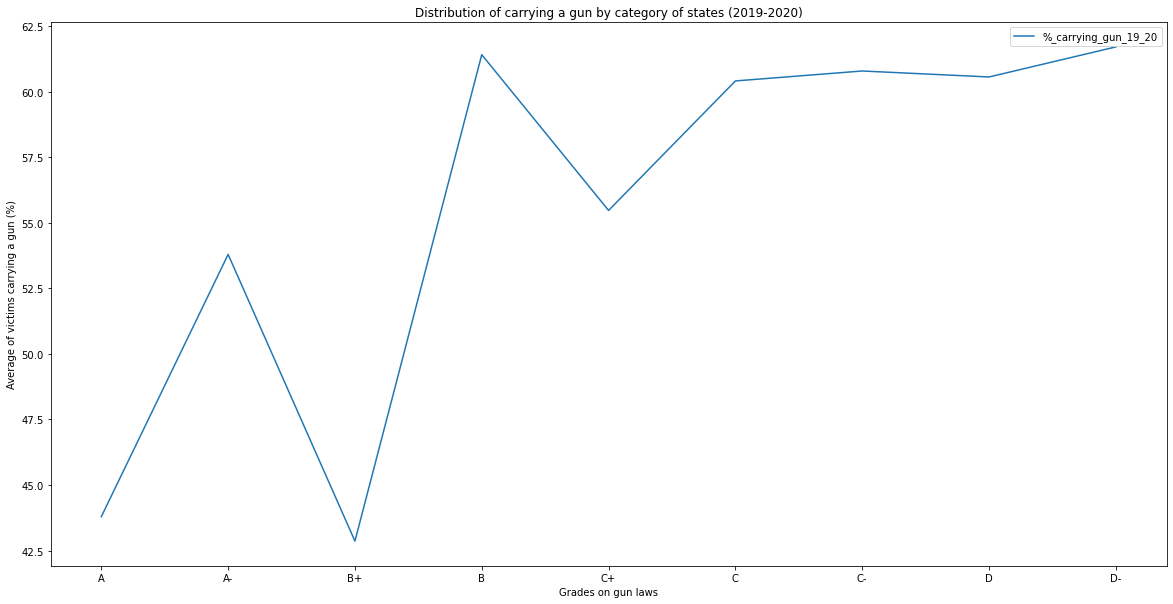

In [23]:
df_avg_19_20 = df_result_19_20.groupby('state_gunlaw_grade').mean()
df_avg_19_20['grade'] = df_avg_19_20.index

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

df_avg_19_20.plot(ax=ax, x='grade', y='%_carrying_gun_19_20')

ax.set_title('Distribution of carrying a gun by category of states (2019-2020)')
ax.set_ylabel('Average of victims carrying a gun (%)')
ax.set_xlabel('Grades on gun laws')

"""Make all grades appear on xticks"""
labels=df_result.state_gunlaw_grade.unique()
xs=range(len(labels))

def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

## Change of behavior over time

**Comparison between A and F states in the number of victims carrying a gun, between 2013 and 2020**

In [24]:
PV_data.head()

,victim_age,victim_gender,victim_race,City,State,criminal_charges,victim_armed,alleged_weapon,victim_fleeing,year
6177,41.0,Male,black,Spartanburg,SC,No known charges,Allegedly Armed,knife,not fleeing,2015
2363,29.0,Male,black,Newark,NJ,No known charges,Vehicle,vehicle,car,2018
2364,37.0,Male,black,Newark,NJ,No known charges,Allegedly Armed,gun,NaN,2018
5686,28.0,Male,black,Wilmington,DE,No known charges,Allegedly Armed,gun,not fleeing,2015
2366,34.0,Male,black,Orlando,FL,No known charges,Allegedly Armed,gun,not fleeing,2018


In [25]:
gunlaw_data.head()

,state_gunlaw_strength,State,state_gunlaw_grade,state_gun_death_rate,state_gun_death_rate_per_100K
0,38,AL,F,2,21.70
1,42,AK,F,7,20.74
2,45,AZ,F,18,15.29
3,40,AR,F,8,18.96
4,1,CA,A,44,7.45


In [26]:
#only keep A and F states
gunlaw_data_A_F = gunlaw_data.query('state_gunlaw_grade == "A" or state_gunlaw_grade == "F"') 

df = pd.merge(PV_data, gunlaw_data_A_F, on='State')
df = df[['State', 'year', 'alleged_weapon', 'state_gunlaw_grade']]
df.head()

,State,year,alleged_weapon,state_gunlaw_grade
0,SC,2015,knife,F
1,SC,2015,gun,F
2,SC,2015,gun,F
3,SC,2015,gun,F
4,SC,2015,vehicle,F


In [27]:
#group by category (A or F) and year => count the total number of victims by state each year
total_df = df.groupby(['state_gunlaw_grade', 'year'], as_index=False).count()
total_df['total_count'] = total_df.State
total_df.head()

,state_gunlaw_grade,year,State,alleged_weapon,total_count
0,A,2013,166,166,166
1,A,2014,154,154,154
2,A,2015,198,198,198
3,A,2016,157,157,157
4,A,2017,179,179,179


In [28]:
#group by category, year and weapon => get the number of victims carrying a gun, each year, in every state
guns_df = df.groupby(['state_gunlaw_grade', 'year', 'alleged_weapon'], as_index=False).count()
guns_df['gun_count'] = guns_df.State
guns_df = guns_df.query('alleged_weapon == "gun"')
guns_df.head()

,state_gunlaw_grade,year,alleged_weapon,State,gun_count
3,A,2013,gun,64,64
24,A,2014,gun,57,57
49,A,2015,gun,75,75
69,A,2016,gun,51,51
89,A,2017,gun,87,87


In [29]:
final_df = pd.merge(total_df, guns_df, on=['state_gunlaw_grade', 'year'])
final_df['%_carrying_gun'] = np.around(final_df.gun_count / final_df.total_count * 100, decimals=2)
final_df = final_df[['state_gunlaw_grade', 'year', '%_carrying_gun']]
final_df

,state_gunlaw_grade,year,%_carrying_gun
0,A,2013,38.55
1,A,2014,37.01
2,A,2015,37.88
3,A,2016,32.48
4,A,2017,48.60
5,A,2018,37.01
6,A,2019,45.67
7,A,2020,40.00
8,F,2013,55.86
9,F,2014,50.72


Text(0, 0.5, '% of victims carrying a gun')

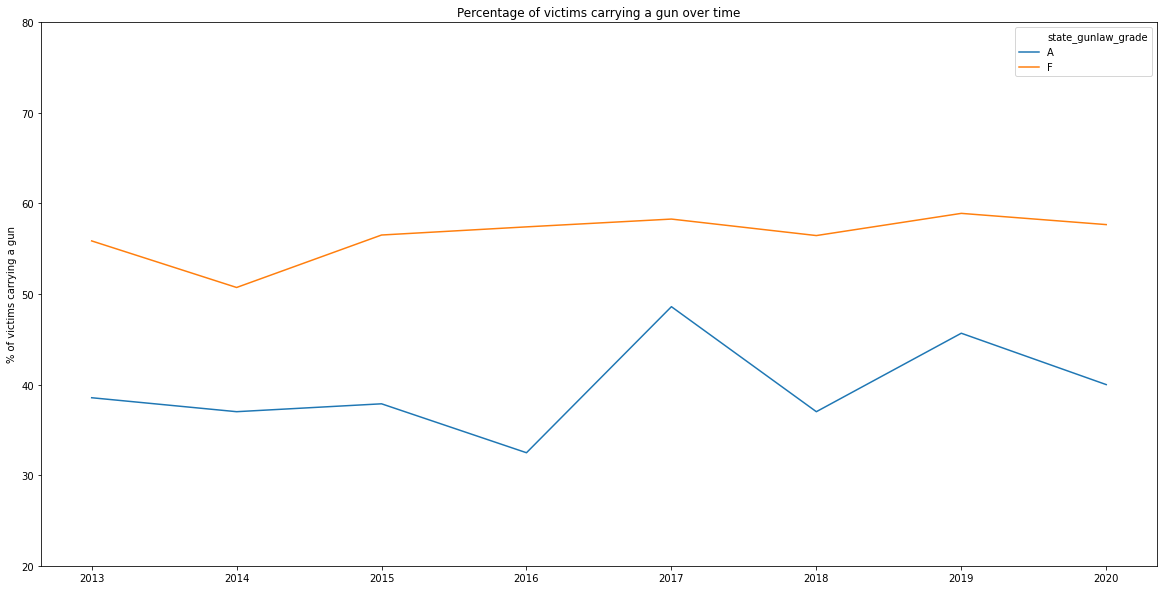

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

sns.lineplot(data=final_df, x="year", y="%_carrying_gun", hue="state_gunlaw_grade")

ax.set_ylim(20,80)

ax.set_title("Percentage of victims carrying a gun over time")
ax.set_xlabel("")
ax.set_ylabel("% of victims carrying a gun")

**Same thing but for 10 best and 10 worst states**

In [31]:
gunlaw_data.head()

,state_gunlaw_strength,State,state_gunlaw_grade,state_gun_death_rate,state_gun_death_rate_per_100K
0,38,AL,F,2,21.70
1,42,AK,F,7,20.74
2,45,AZ,F,18,15.29
3,40,AR,F,8,18.96
4,1,CA,A,44,7.45


In [32]:
top_10 = range(11)
worst_10 = range(41, 51)
gunlaw_data_10 = gunlaw_data.query('state_gunlaw_strength in @top_10 or state_gunlaw_strength in @worst_10 ')

def f(s):
    top_10 = range(11)
    if (s in top_10):
        return "top 10"
    else:
        return "worst 10"
gunlaw_data_10['category'] = gunlaw_data_10.apply(lambda state: f(state['state_gunlaw_strength']), axis=1)

<ipython-input-32-18c7f8616b0d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gunlaw_data_10['category'] = gunlaw_data_10.apply(lambda state: f(state['state_gunlaw_strength']), axis=1)


In [33]:
df = pd.merge(PV_data, gunlaw_data_10, on='State')
df = df[['State', 'year', 'alleged_weapon', 'category']]
df.head()

,State,year,alleged_weapon,category
0,NJ,2018,vehicle,top 10
1,NJ,2018,gun,top 10
2,NJ,2018,undetermined,top 10
3,NJ,2018,knife,top 10
4,NJ,2018,no object,top 10


In [34]:
"""group by State and year => count the total number of victims by category each year"""
total_df = df.groupby(['category', 'year'], as_index=False).count()
total_df['total_count'] = total_df.State
total_df.head()

,category,year,State,alleged_weapon,total_count
0,top 10,2013,279,279,279
1,top 10,2014,265,265,265
2,top 10,2015,290,290,290
3,top 10,2016,272,272,272
4,top 10,2017,279,279,279


In [35]:
#group by category, year and weapon => get the number of victims carrying a gun, each year, in every category
guns_df = df.groupby(['category', 'year', 'alleged_weapon'], as_index=False).count()
guns_df['gun_count'] = guns_df.State
guns_df = guns_df.query('alleged_weapon == "gun"')
guns_df.head()

,category,year,alleged_weapon,State,gun_count
3,top 10,2013,gun,115,115
28,top 10,2014,gun,105,105
58,top 10,2015,gun,119,119
85,top 10,2016,gun,106,106
112,top 10,2017,gun,138,138


In [36]:
final_df = pd.merge(total_df, guns_df, on=['category', 'year'])
final_df['%_carrying_gun'] = np.around(final_df.gun_count / final_df.total_count * 100, decimals=2)
final_df = final_df[['category', 'year', '%_carrying_gun']]
final_df

,category,year,%_carrying_gun
0,top 10,2013,41.22
1,top 10,2014,39.62
2,top 10,2015,41.03
3,top 10,2016,38.97
4,top 10,2017,49.46
5,top 10,2018,43.84
6,top 10,2019,47.00
7,top 10,2020,46.91
8,worst 10,2013,64.63
9,worst 10,2014,52.10


Text(0, 0.5, '% of victims carrying a gun')

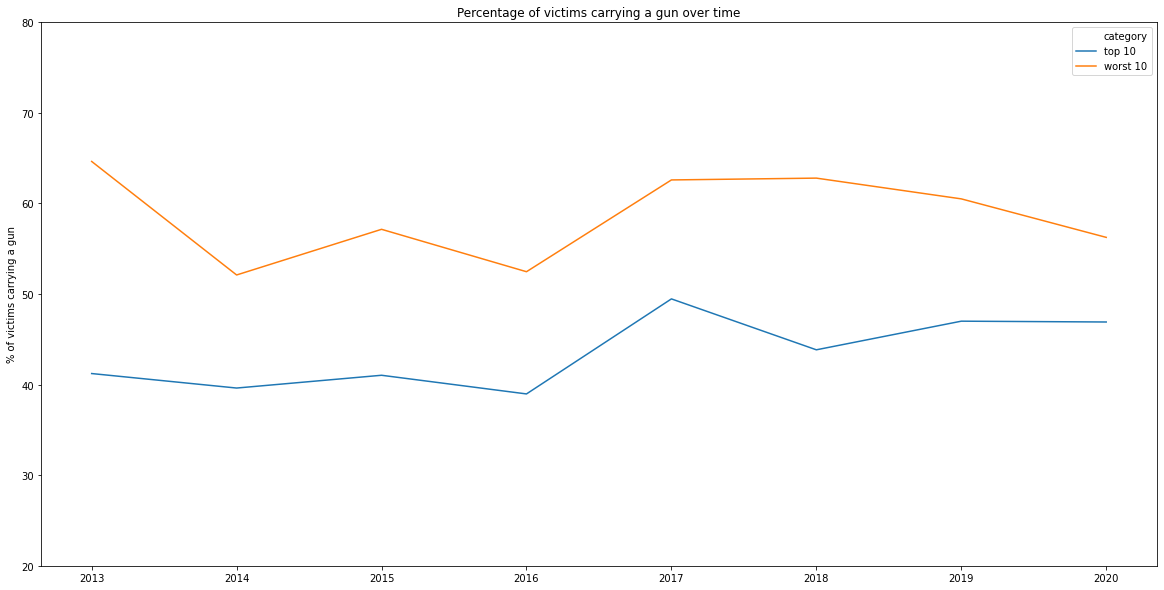

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

sns.lineplot(data=final_df, x="year", y="%_carrying_gun", hue="category")

ax.set_ylim(20,80)

ax.set_title("Percentage of victims carrying a gun over time")
ax.set_xlabel("")
ax.set_ylabel("% of victims carrying a gun")

***